#### Data Description:
We use the following representation to collect the dataset

age - age

bp - blood pressure

sg - specific gravity

al - albumin

su - sugar

rbc - red blood cells

pc - pus cell

pcc - pus cell clumps

ba - bacteria

bgr - blood glucose random

bu - blood urea

sc - serum creatinine

sod - sodium

pot - potassium

hemo - hemoglobin

pcv - packed cell volume

wc - white blood cell count

rc - red blood cell count

htn - hypertension

dm - diabetes mellitus

cad - coronary artery disease

appet - appetite

pe - pedal edema

ane - anemia

class - class

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data
df = pd.read_csv("../input/ckdisease/kidney_disease.csv")

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [8]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


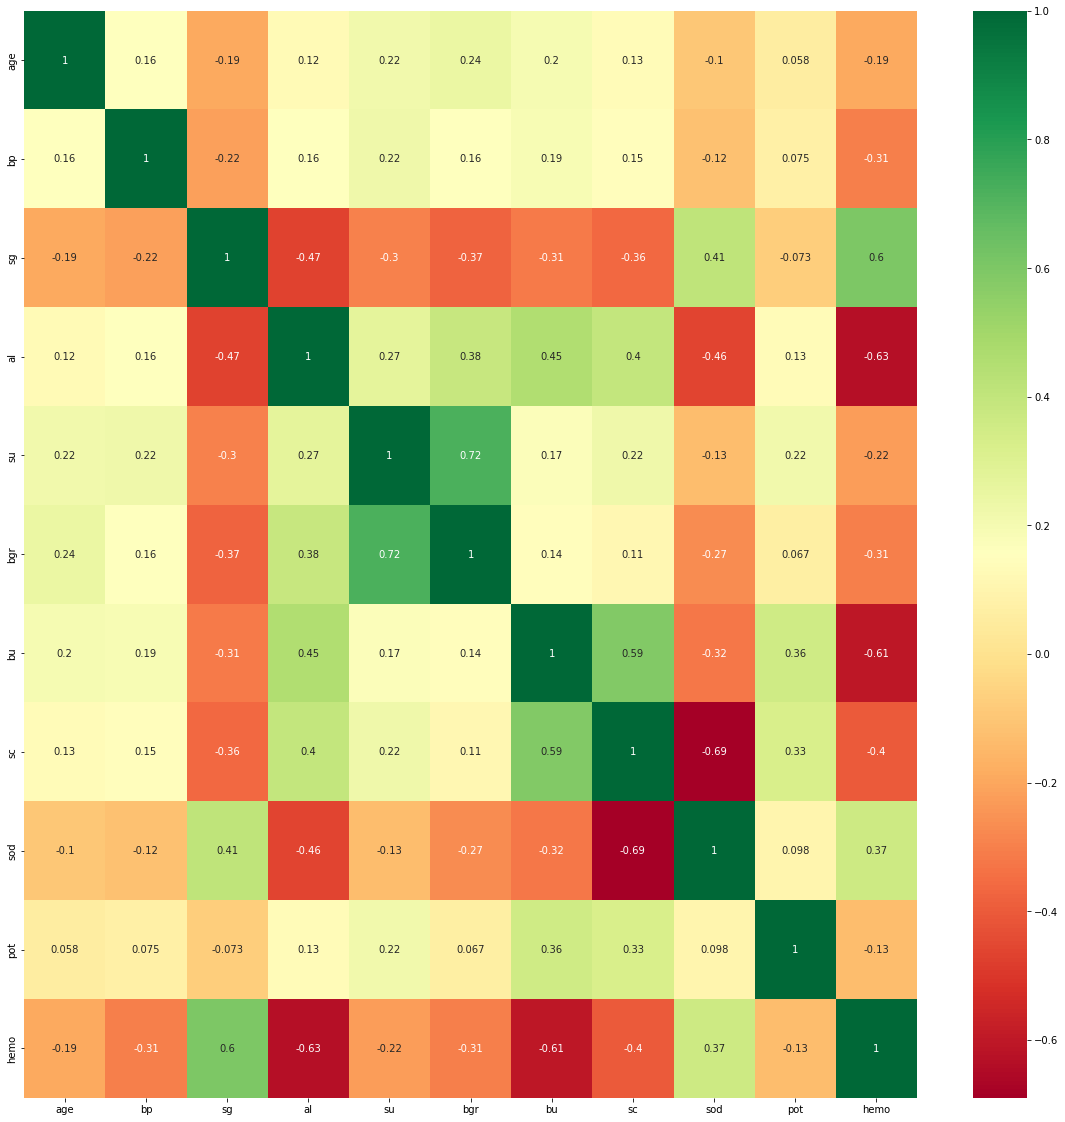

In [9]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [11]:
object_dtypes = df.select_dtypes(include = 'object')
object_dtypes

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


In [12]:
# Mapping
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})

In [13]:
for i in df['pcv']:
    print(i)

44
38
31
32
35
39
36
44
33
29
28
32
28
nan
16
24
nan
nan
37
30
24
32
32
nan
39
29
35
37
nan
38
nan
30
34
29
nan
36
32
28
nan
40
32
nan
33
24
28
nan
37
45
29
29
28
33
34
40
40
28
30
nan
33
nan
nan
nan
33
27
nan
48
	?
nan
37
52
44
28
nan
14
29
nan
36
34
30
40
31
29
nan
nan
22
nan
nan
32
nan
nan
40
52
33
30
36
nan
36
32
18
32
nan
33
52
36
nan
42
17
34
37
nan
34
32
33
nan
nan
44
nan
37
nan
nan
nan
46
nan
42
28
nan
37
35
23
nan
22
36
24
37
33
39
nan
29
nan
33
nan
19
nan
nan
33
24
nan
25
nan
32
41
30
32
22
26
36
nan
39
31
35
35
42
37
27
40
nan
nan
42
39
27
33
26
34
41
35
nan
23
41
34
39
28
30
35
nan
31
34
nan
34
38
29
30
26
nan
15
nan
nan
24
nan
30
25
37
21
24
nan
31
43
41
41
41
nan
20
nan
31
34
	43
nan
38
36
34
28
36
nan
nan
38
nan
35
26
36
nan
31
nan
35
nan
nan
44
26
25
40
28
39
36
31
28
47
40
19
26
nan
37
9
48
52
46
42
49
52
41
46
44
45
45
41
43
45
50
48
41
48
53
48
41
42
42
nan
44
43
41
50
44
48
52
41
44
43
52
41
44
43
50
43
52
41
52
48
40
50
41
45
48
52
43
41
48
50
45
41
52
44
48
40
44


In [14]:
for i in df['wc']:
    print(i)

7800
6000
7500
6700
7300
7800
nan
6900
9600
12100
nan
4500
12200
nan
11000
3800
nan
nan
11400
5300
9200
6200
6900
nan
8300
8400
10300
9600
nan
nan
nan
7800
9600
nan
nan
9800
nan
6900
nan
9800
9100
nan
9200
7900
nan
nan
6400
8600
18900
21600
11000
nan
4300
8500
9800
nan
11300
nan
7200
nan
nan
nan
7700
nan
nan
nan
nan
nan
nan
6900
8300
14600
nan
6300
6400
nan
	6200
7100
nan
11800
9400
5500
nan
nan
3800
nan
nan
5800
13200
nan
9800
12500
5600
7000
11900
nan
nan
9100
5800
10400
nan
10700
7000
12700
nan
6800
6500
13600
10200
nan
11400
9000
nan
9800
10300
5600
nan
9800
nan
nan
nan
nan
nan
14900
5500
nan
8200
15200
5000
nan
16300
12400
13200
	8400
10200
nan
nan
9200
nan
nan
nan
6500
nan
nan
10500
4200
nan
15200
nan
nan
6700
nan
nan
14600
nan
4700
nan
7900
nan
10900
9400
10200
6000
8100
9500
nan
nan
2200
6700
nan
9600
12800
12800
11200
8600
4200
12400
nan
9800
nan
nan
19100
nan
nan
5800
	?
nan
12300
nan
7500
16700
9200
nan
2600
nan
nan
9600
4300
26400
10700
7900
nan
nan
nan
nan
nan
nan
10400
69

In [15]:
for i in df['rc']:
    print(i)

5.2
nan
nan
3.9
4.6
4.4
nan
5
4.0
3.7
nan
3.8
3.4
nan
2.6
2.8
nan
nan
4.3
3.7
3.2
3.6
3.4
nan
4.6
3.7
4
4.1
nan
nan
nan
4
4.0
nan
nan
4.9
nan
2.5
nan
4.2
4.1
nan
4.5
3.1
nan
nan
4.7
nan
3.5
3.5
3.8
nan
3.7
4.7
4.2
nan
3.4
nan
4.3
nan
nan
nan
3.8
nan
nan
nan
nan
nan
nan
6.0
5.2
3.2
nan
nan
3.4
nan
4
3.7
nan
5.0
3.8
3.7
nan
nan
2.1
nan
nan
5
4.7
nan
4.2
5.6
3.6
3.2
3.9
nan
nan
4.0
2.3
4.2
nan
3.9
nan
4.2
nan
5.2
nan
4.4
4.2
nan
4.7
3.9
nan
nan
nan
4.3
nan
4.4
nan
nan
nan
nan
nan
nan
3.6
nan
4.5
4.3
2.9
nan
2.7
nan
2.7
8.0
3.8
nan
nan
nan
nan
nan
nan
nan
nan
nan
4.1
3.3
nan
3.0
nan
nan
nan
nan
nan
2.9
3
nan
nan
3.9
nan
4.3
2.4
4.8
	?
3.2
5.4
nan
nan
nan
nan
nan
4.4
3.1
4.9
nan
4.6
3.4
3.9
nan
nan
nan
nan
3.7
nan
nan
3.6
nan
nan
nan
nan
3.4
4.8
3.4
nan
2.8
nan
nan
3.5
3.0
3.9
3.2
3.9
nan
nan
nan
nan
nan
nan
4.6
4.9
nan
3.9
nan
3.4
3.7
5.2
nan
nan
4.3
nan
3.3
nan
nan
nan
4.6
nan
4.5
3.4
3.8
nan
3.8
nan
nan
nan
nan
5.2
nan
nan
nan
nan
nan
4.1
3.9
3.3
6.1
4.6
2.6
2.5
nan
4.1
2.1
4.5
5.0
4.7
6

In [16]:
df['wc']=df['wc'].replace(["\t6200","\t8400","\t?"],[6200,8400, np.nan])
df['pcv']=df['pcv'].replace(["\t43","\t?"],[43,np.nan])
df['rc']=df['rc'].replace(["\t?"],[np.nan])

In [17]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', 6200, '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', 8400, '10500', '4200', '4700',
       '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '12300', '16700', '2600', '26400', '8800', '7400', '4900', '8000',
       '12000', '15700', '4100', '5700', '11500', '5400', '10800', '9900',
       '5200', '5900', '9300', '9700', '5100', '6600'], dtype=object)

In [18]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '52', '14',
       '22', '18', '42', '17', '46', '23', '19', '25', '41', '26', '15',
       '21', '43', '20', 43, '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [19]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '5.4', '6.1',
       '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9',
       '6.5'], dtype=object)

In [20]:
df = df.fillna(method='ffill')
df = df.fillna(method='backfill')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    float64
 6   pc              400 non-null    float64
 7   pcc             400 non-null    float64
 8   ba              400 non-null    float64
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object 
 16  wc              400 non-null    object 
 17  rc              400 non-null    obj

In [22]:
df.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [23]:
df['pcv']=df['pcv'].astype(int)
df['wc']=df['wc'].astype(int)
df['rc']=df['rc'].astype(float)

In [24]:
# Further cleaning
df['pe'] = df['pe'].replace(to_replace='good',value=0)
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    float64
 6   pc              400 non-null    float64
 7   pcc             400 non-null    float64
 8   ba              400 non-null    float64
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int64  
 16  wc              400 non-null    int64  
 17  rc              400 non-null    flo

In [26]:
df['classification'].value_counts()

1.0    250
0.0    150
Name: classification, dtype: int64

In [27]:
target_true_count = len(df.loc[df['classification'] == 1])
target_false_count = len(df.loc[df['classification'] == 0])
target_true_count, target_false_count

(250, 150)

<AxesSubplot:xlabel='classification', ylabel='count'>

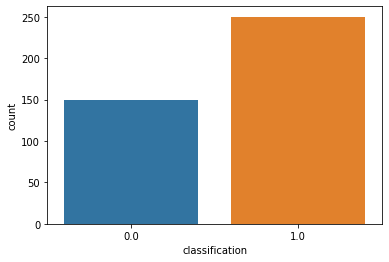

In [28]:
# plotting graph for output classes counts
sns.countplot(x = 'classification',data = df)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'sg'}>,
        <AxesSubplot:title={'center':'al'}>,
        <AxesSubplot:title={'center':'su'}>],
       [<AxesSubplot:title={'center':'rbc'}>,
        <AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'pcc'}>,
        <AxesSubplot:title={'center':'ba'}>,
        <AxesSubplot:title={'center':'bgr'}>],
       [<AxesSubplot:title={'center':'bu'}>,
        <AxesSubplot:title={'center':'sc'}>,
        <AxesSubplot:title={'center':'sod'}>,
        <AxesSubplot:title={'center':'pot'}>,
        <AxesSubplot:title={'center':'hemo'}>],
       [<AxesSubplot:title={'center':'pcv'}>,
        <AxesSubplot:title={'center':'wc'}>,
        <AxesSubplot:title={'center':'rc'}>,
        <AxesSubplot:title={'center':'htn'}>,
        <AxesSubplot:title={'center':'dm'}>],
       [<AxesSubplot:title={'center':'cad'}>,
        <AxesSubplot:title={'center':'ap

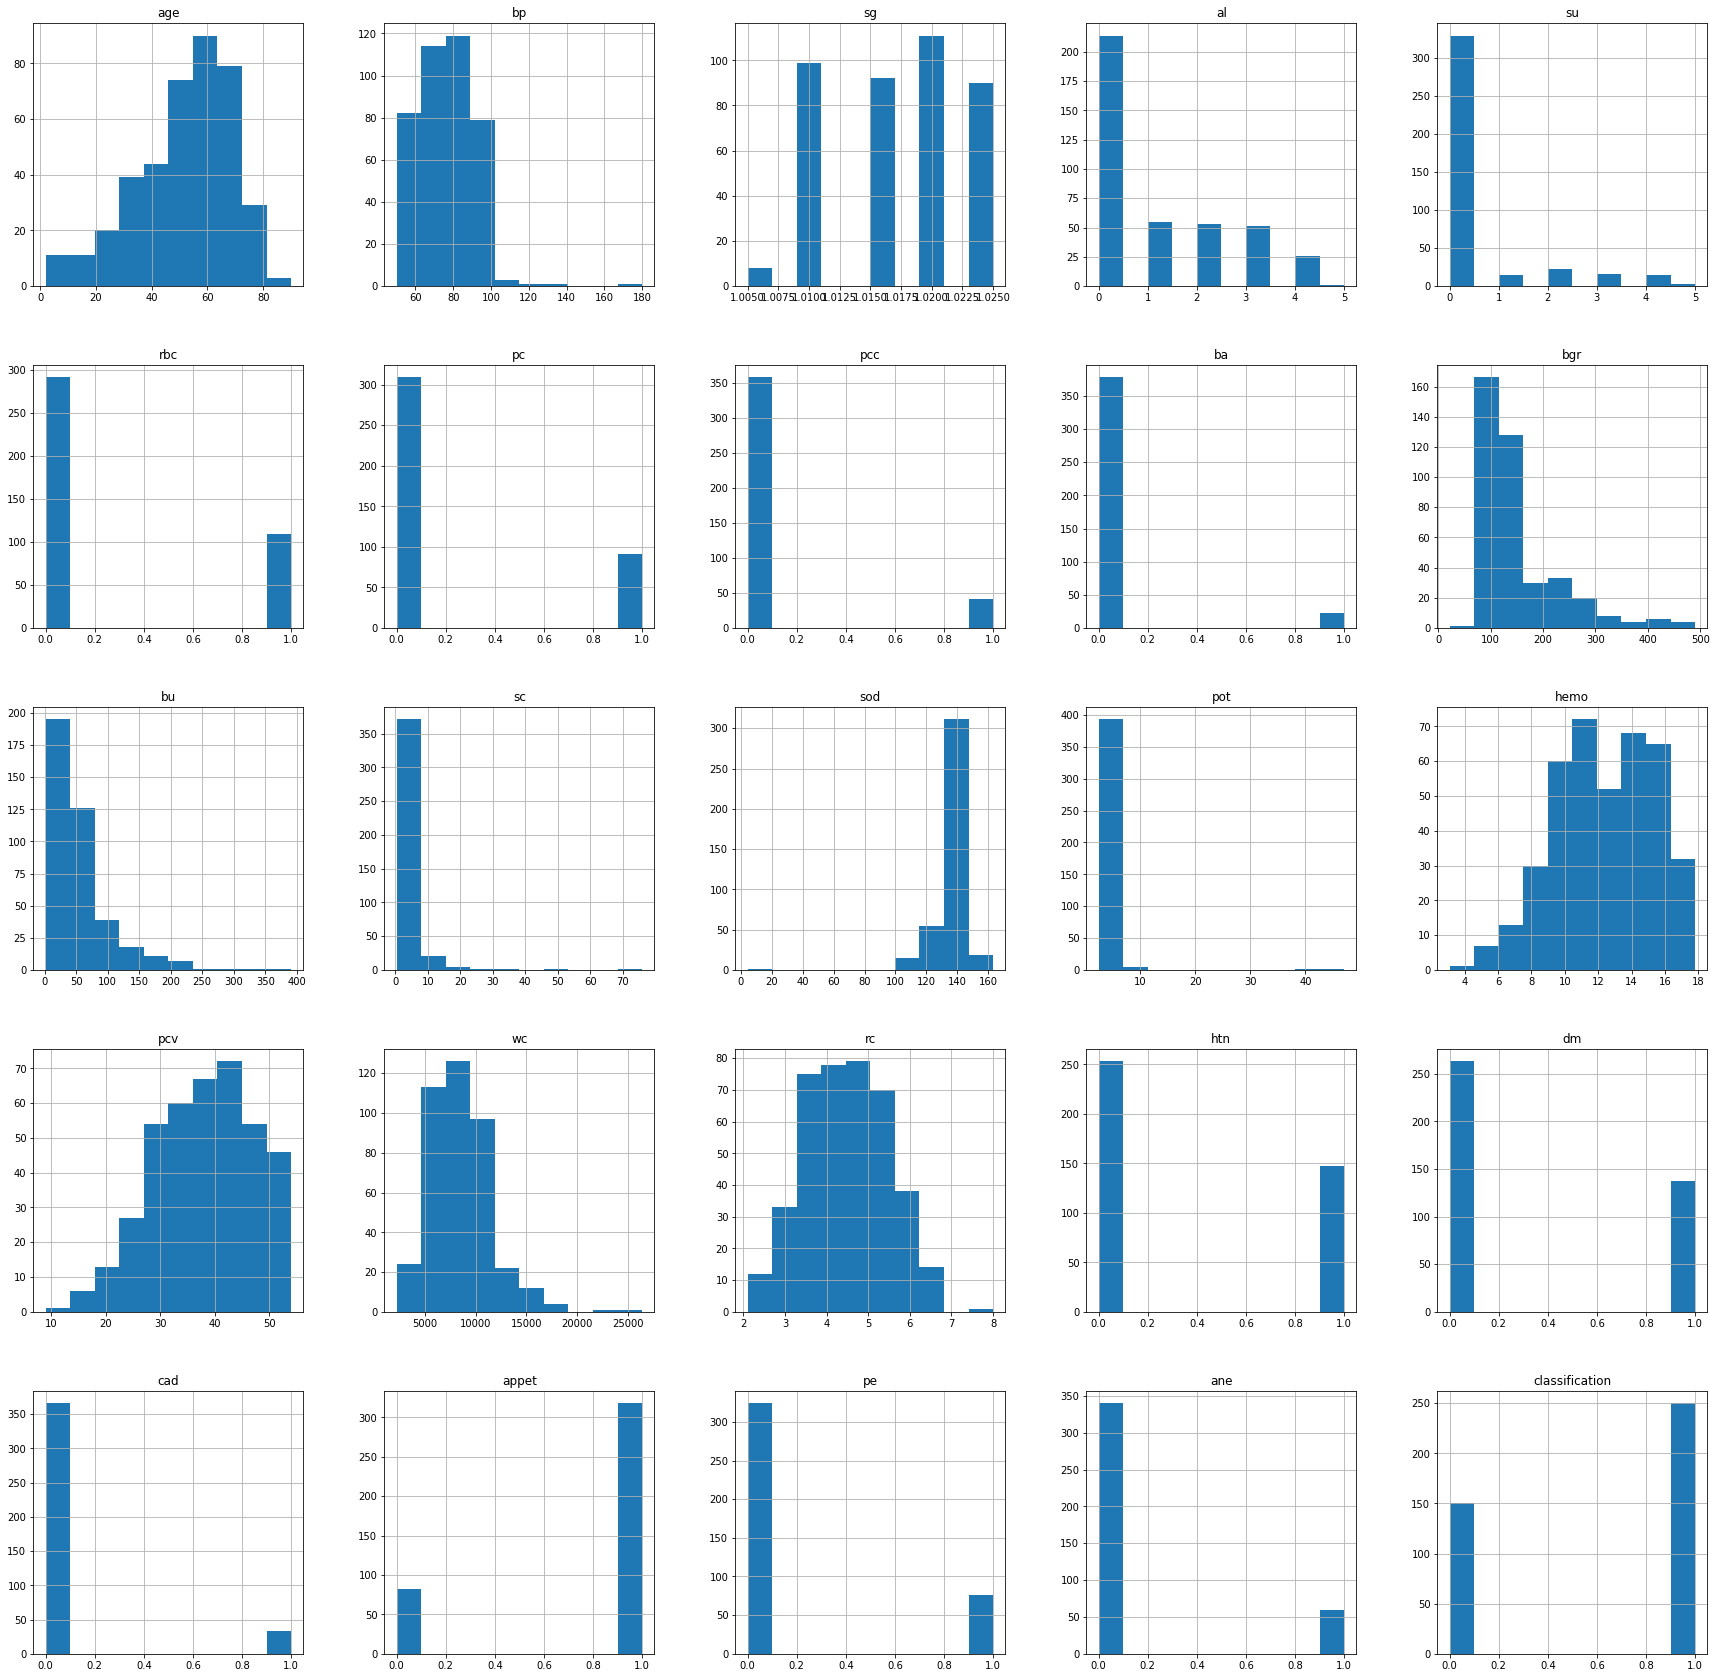

In [29]:
# plotting variation graphs for each property
df.hist(figsize = (30,30))

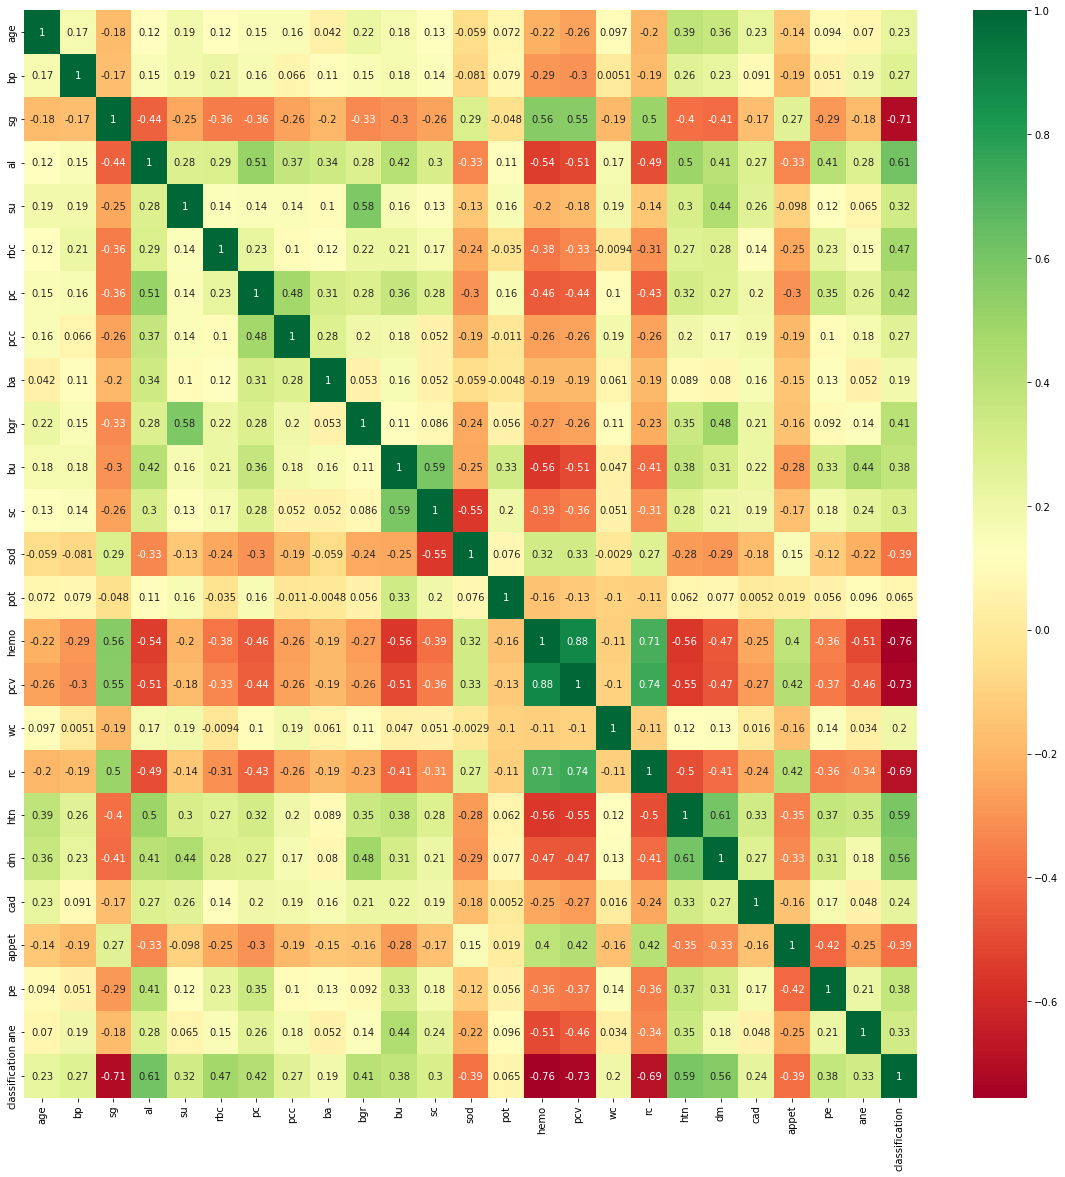

In [30]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [31]:
from sklearn.model_selection import train_test_split
feature_columns = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu','sc', 'sod', 
                   'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane']
predicted_class = ['classification']

In [32]:
X = df[feature_columns]
y = df[predicted_class]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [33]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

model = random_forest_model.fit(X_train, y_train)

In [34]:
predict_train_data = model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 1.000


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_train_data)
cm

array([[37,  0],
       [ 0, 83]])

In [36]:
import joblib
joblib.dump(model, "./rf_kidney.joblib")

['./rf_kidney.joblib']